# Компьютерные игры: продажи и продвижение.

### Общее описание проекта и исходные данные

Интернет-магазин продаёт компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

<span style="color:green"> **Задача исследования:** </span>

выявить закономерности, определяющие успешность игры; это позволит акцентироваться на продвижении потенциально популярного продукта и спланировать рекламные кампании.

### Обзор данных

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats as st
import numpy as np

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

#### **Обзор данных**

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Скорректировали названия столбцов.

In [5]:
data.columns =['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales',
               'other_sales', 'critic_score', 'user_score', 'rating']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
data.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('coolwarm')

,0
platform,0.00%
na_sales,0.00%
eu_sales,0.00%
jp_sales,0.00%
other_sales,0.00%
name,0.01%
genre,0.01%
year_of_release,1.61%
user_score,40.09%
rating,40.48%


Пропуски сконцентрированы в трёх столбцах. Важные для исследования данные о продажах пропусков не содержат.

Откуда взялись пропуски? Вероятнее всего, пропуски - следствие особенностей игровых платформ. В таблице ниже приведён фрагмент таблицы, из которой видно, что доли пропусков в `critic_score` сильно разнятся от платформы к платформе.

In [10]:
def nan(data):
    nan_values = data.isna().sum()/data.shape[0]
    return nan_values
data.groupby('platform').agg(nan).reset_index().sample(10)

,platform,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11,NES,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000
9,GG,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000
4,DS,0.0,0.013947,0.0,0.0,0.0,0.0,0.0,0.666667,0.408647,0.408182
23,SNES,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000
27,WiiU,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.387755,0.285714,0.285714
6,GBA,0.0,0.013382,0.0,0.0,0.0,0.0,0.0,0.467153,0.371046,0.364964
14,PCFX,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000
29,XB,0.0,0.025485,0.0,0.0,0.0,0.0,0.0,0.120146,0.106796,0.110437
26,Wii,0.0,0.025758,0.0,0.0,0.0,0.0,0.0,0.556818,0.242424,0.240909
1,3DO,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


**По изучении данных обнаружили:**

- название игры: есть 2 пропуска, формат верный;
- платформа: нет пропусков, формат верный;
- год выхода: пропусков около 1,5 %; возможно, менять формат на int;
- жанр: есть 2 пропуска, формат верный;
- продажи в Северной Америке: нет пропусков, формат верный;
- продажи в Европе: нет пропусков, формат верный;
- продажи в Японии: нет пропусков, формат верный;
- продажи в других регионах: нет пропусков, формат верный;
- оценка критиков: много пропусков, формат верный;
- оценка пользователей: много пропусков, формат менять на foat64;
- рейтинг: много пропусков.

#### **Промежуточные выводы.**

1. Изучили исходные данные.
2. Значительная часть данных - разделённые по регионам данные о продажах игр. В этой части данные полные, корректные, без пропусков.
3. Большое количество пропусков в данных об оценках критиков и пользователей. Скорее всего, наличие пропусков в этих данных - следствие особенностей игровых платформ.
4. Относительно небольшое количество пропусков есть в данных о названиях игр, жанрах и годах выхода игр.

---

### Предобработка данных

#### **Название игры**

In [11]:
len(data['name'].unique())

11560

In [12]:
list(data['name'].unique())

['Wii Sports',
 'Super Mario Bros.',
 'Mario Kart Wii',
 'Wii Sports Resort',
 'Pokemon Red/Pokemon Blue',
 'Tetris',
 'New Super Mario Bros.',
 'Wii Play',
 'New Super Mario Bros. Wii',
 'Duck Hunt',
 'Nintendogs',
 'Mario Kart DS',
 'Pokemon Gold/Pokemon Silver',
 'Wii Fit',
 'Kinect Adventures!',
 'Wii Fit Plus',
 'Grand Theft Auto V',
 'Grand Theft Auto: San Andreas',
 'Super Mario World',
 'Brain Age: Train Your Brain in Minutes a Day',
 'Pokemon Diamond/Pokemon Pearl',
 'Super Mario Land',
 'Super Mario Bros. 3',
 'Grand Theft Auto: Vice City',
 'Pokemon Ruby/Pokemon Sapphire',
 'Brain Age 2: More Training in Minutes a Day',
 'Pokemon Black/Pokemon White',
 'Gran Turismo 3: A-Spec',
 'Call of Duty: Modern Warfare 3',
 'Pokémon Yellow: Special Pikachu Edition',
 'Call of Duty: Black Ops 3',
 'Call of Duty: Black Ops',
 'Pokemon X/Pokemon Y',
 'Call of Duty: Black Ops II',
 'Call of Duty: Modern Warfare 2',
 'Grand Theft Auto III',
 'Super Smash Bros. Brawl',
 'Mario Kart 7',
 'Ani

В исходных данных данные о многих играх. В названиях встречаются цифры и спец. символы - это может мешать попыткам обратиться к строке по названию игры. В частности, видим в названиях апострофы. Добавили в `data` новый столбец `corr_name`: в нём названия игр с нижним подчёркиванием вместо апострофа. Исходный столбец `name` сохранили.

In [13]:
data['corr_name'] = data['name'].str.replace('\'', '_')
list(data['corr_name'].unique())

['Wii Sports',
 'Super Mario Bros.',
 'Mario Kart Wii',
 'Wii Sports Resort',
 'Pokemon Red/Pokemon Blue',
 'Tetris',
 'New Super Mario Bros.',
 'Wii Play',
 'New Super Mario Bros. Wii',
 'Duck Hunt',
 'Nintendogs',
 'Mario Kart DS',
 'Pokemon Gold/Pokemon Silver',
 'Wii Fit',
 'Kinect Adventures!',
 'Wii Fit Plus',
 'Grand Theft Auto V',
 'Grand Theft Auto: San Andreas',
 'Super Mario World',
 'Brain Age: Train Your Brain in Minutes a Day',
 'Pokemon Diamond/Pokemon Pearl',
 'Super Mario Land',
 'Super Mario Bros. 3',
 'Grand Theft Auto: Vice City',
 'Pokemon Ruby/Pokemon Sapphire',
 'Brain Age 2: More Training in Minutes a Day',
 'Pokemon Black/Pokemon White',
 'Gran Turismo 3: A-Spec',
 'Call of Duty: Modern Warfare 3',
 'Pokémon Yellow: Special Pikachu Edition',
 'Call of Duty: Black Ops 3',
 'Call of Duty: Black Ops',
 'Pokemon X/Pokemon Y',
 'Call of Duty: Black Ops II',
 'Call of Duty: Modern Warfare 2',
 'Grand Theft Auto III',
 'Super Smash Bros. Brawl',
 'Mario Kart 7',
 'Ani

Пропусков мало. Удалили их.

In [14]:
data.dropna(subset=['corr_name'], axis=0, inplace=True)
data['corr_name'].isna().sum()

0

Ещё раз просмотрели список названий игр. Иных изменений в названия не вносили.

In [15]:
sorted(list(data['corr_name'].unique()))

[' Beyblade Burst',
 ' Fire Emblem Fates',
 ' Frozen: Olaf_s Quest',
 ' Haikyu!! Cross Team Match!',
 ' Tales of Xillia 2',
 '.hack//G.U. Vol.1//Rebirth',
 '.hack//G.U. Vol.2//Reminisce',
 '.hack//G.U. Vol.2//Reminisce (jp sales)',
 '.hack//G.U. Vol.3//Redemption',
 '.hack//Infection Part 1',
 '.hack//Link',
 '.hack//Mutation Part 2',
 '.hack//Outbreak Part 3',
 '.hack//Quarantine Part 4: The Final Chapter',
 '.hack: Sekai no Mukou ni + Versus',
 '007 Racing',
 '007: Quantum of Solace',
 '007: The World is not Enough',
 '007: Tomorrow Never Dies',
 '1 vs. 100',
 '1/2 Summer +',
 '10 Minute Solution',
 '100 All-Time Favorites',
 '100 Classic Books',
 '100 Classic Games',
 '1000 Cooking Recipes from ELLE à table',
 '1001 Touch Games',
 '101-in-1 Explosive Megamix',
 '101-in-1 Party Megamix Wii',
 '101-in-1 Sports Megamix',
 '101-in-1 Sports Party Megamix',
 '1080°: TenEighty Snowboarding',
 '11eyes: CrossOver',
 '12-Sai. Honto no Kimochi',
 '12-Sai. Koisuru Diary',
 '12Riven: The Psi-Cli

Неявные дубликаты не обнаружили.

Учитываем, что одна и та же игра могла выходить на разных платформах. Поэтому уникальных названий меньше, чем строк. Например:

In [16]:
data.query('corr_name == "Assassin_s Creed"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,corr_name
160,Assassin's Creed,X360,2007.0,Adventure,3.28,1.64,0.07,0.56,81.0,7.7,M,Assassin_s Creed
219,Assassin's Creed,PS3,2007.0,Adventure,1.91,2.00,0.09,0.82,81.0,7.3,M,Assassin_s Creed
2276,Assassin's Creed,PC,2008.0,Adventure,0.01,0.83,0.00,0.07,NaN,NaN,NaN,Assassin_s Creed


#### **Платформа**

Изучили перечень платформ. Дубликаты, ошибки не обнаружили. Изменений не вносили.

In [17]:
sorted(list(data['platform'].unique()))

['2600',
 '3DO',
 '3DS',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PC',
 'PCFX',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

#### **Год выпуска**

In [18]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

В столбце есть пропуски, их более 1,5 %. При необходимости их можно заполнить вручную данными из открытых источников. В условиях настоящего исследования в этом нет необходимости. Пропуски имеются у разных игр на разных платформах; вероятно, они не связаны с тем, вышла игра относительно давно или недавно.

Пропуски удалили.

In [19]:
data.dropna(subset=['year_of_release'], axis=0, inplace=True)
data['year_of_release'].isna().sum()

0

Сохраним формат `float`. Фактически в `year_of_release` только целые числа, однако для нужд исследования данные можно применить в исходном виде.

#### **Жанр игры**

In [20]:
data['genre'].isna().sum()

0

In [21]:
data['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Пропуски удалились на предыдущих шагах.

#### **Продажи в Северной Америке**

In [22]:
data['na_sales'].describe()

count    16444.000000
mean         0.264012
std          0.818378
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

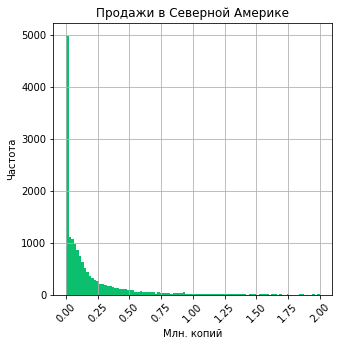

In [23]:
#здесь и далее приводим гистограммы в мелком и более крупном масштабах
data['na_sales'].hist(grid=True, xlabelsize=10, xrot=45, ylabelsize=10, yrot=0,
                      figsize=(5, 5), bins=100, range=(0, 2), color='#0BBF6E')
plt.xlabel('Млн. копий')
plt.ylabel('Частота')
plt.title('Продажи в Северной Америке')
plt.show()

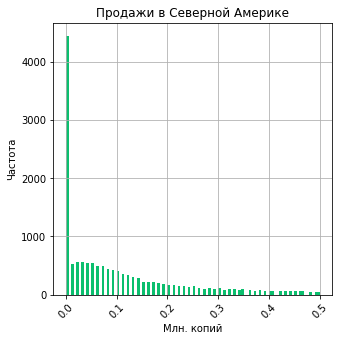

In [24]:
data['na_sales'].hist(grid=True, xlabelsize=10, xrot=45, ylabelsize=10,
                      yrot=0, figsize=(5, 5), bins=100, range=(0, 0.5), color='#0BBF6E')
plt.xlabel('Млн. копий')
plt.ylabel('Частота')
plt.title('Продажи в Северной Америке')
plt.show()

In [25]:
data.query('na_sales==0')['na_sales'].count()

4449

Распределение далеко от нормального. Много значений, равных `0`, что легко объяснимо: многие игры не продавались в Северной Америке. При этом имеются немногочисленные игры с относительно высокими объёмами продаж.

#### **Продажи в Европе**

In [26]:
data['eu_sales'].describe()

count    16444.000000
mean         0.145930
std          0.506716
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

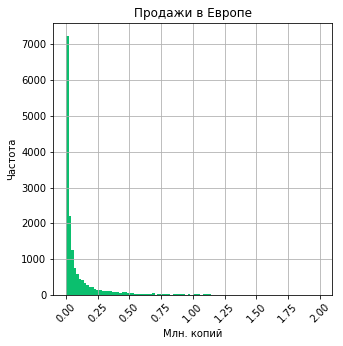

In [27]:
data['eu_sales'].hist(grid=True, xlabelsize=10, xrot=45, ylabelsize=10, yrot=0,
                      figsize=(5, 5), bins=100, range=(0, 2), color='#0BBF6E')
plt.xlabel('Млн. копий')
plt.ylabel('Частота')
plt.title('Продажи в Европе')
plt.show()

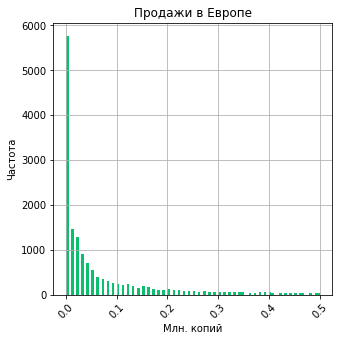

In [28]:
data['eu_sales'].hist(grid=True, xlabelsize=10, xrot=45, ylabelsize=10,
                      yrot=0, figsize=(5, 5), bins=100, range=(0, 0.5), color='#0BBF6E')
plt.xlabel('Млн. копий')
plt.ylabel('Частота')
plt.title('Продажи в Европе')
plt.show()

In [29]:
data.query('eu_sales==0')['eu_sales'].count()

5766

Картина аналогична предыдущему столбцу.

#### **Продажи в Японии**

In [30]:
data['jp_sales'].describe()

count    16444.000000
mean         0.078487
std          0.311100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

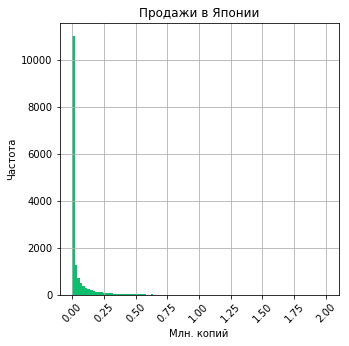

In [31]:
data['jp_sales'].hist(grid=True, xlabelsize=10, xrot=45, ylabelsize=10,
                      yrot=0, figsize=(5, 5), bins=100, range=(0, 2), color='#0BBF6E')
plt.xlabel('Млн. копий')
plt.ylabel('Частота')
plt.title('Продажи в Японии')
plt.show()

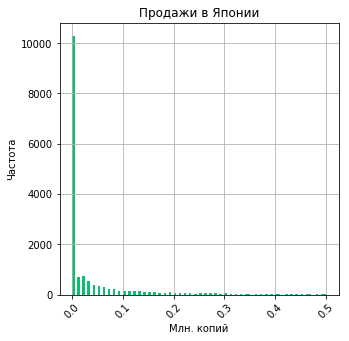

In [32]:
data['jp_sales'].hist(grid=True, xlabelsize=10, xrot=45, ylabelsize=10,
                      yrot=0, figsize=(5, 5), bins=100, range=(0, 0.5), color='#0BBF6E')
plt.xlabel('Млн. копий')
plt.ylabel('Частота')
plt.title('Продажи в Японии')
plt.show()

In [33]:
data.query('jp_sales==0')['jp_sales'].count()

10300

Характер распределения аналогичен предыдущим.

Однако:
- объёмы продаж в целом ниже;
- меньше игр с относительно высокими продажами;
- больше игр с нулевыми объёмами (не продавались в Японии).

Отличия можно объяснить относительной закрытостью японского рынка и, возможно, специальными предпочтениями игроков в Японии.

#### **Продажи в других регионах**

In [34]:
data['other_sales'].describe()

count    16444.000000
mean         0.047594
std          0.188005
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

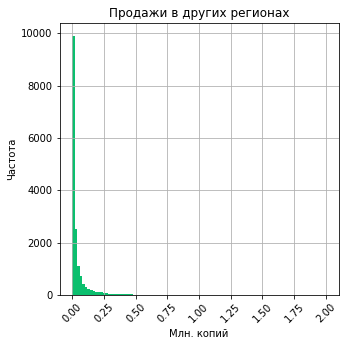

In [35]:
data['other_sales'].hist(grid=True, xlabelsize=10, xrot=45, ylabelsize=10,
                         yrot=0, figsize=(5, 5), bins=100, range=(0, 2), color='#0BBF6E')
plt.xlabel('Млн. копий')
plt.ylabel('Частота')
plt.title('Продажи в других регионах')
plt.show()

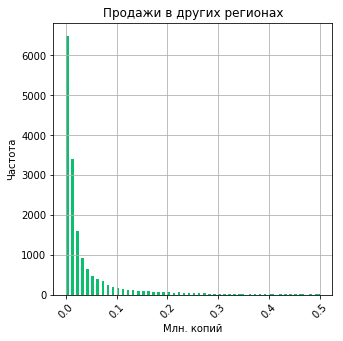

In [36]:
data['other_sales'].hist(grid=True, xlabelsize=10, xrot=45, ylabelsize=10,
                         yrot=0, figsize=(5, 5), bins=100, range=(0, 0.5), color='#0BBF6E')
plt.xlabel('Млн. копий')
plt.ylabel('Частота')
plt.title('Продажи в других регионах')
plt.show()

In [37]:
data.query('other_sales==0')['other_sales'].count()

6492

Распределение аналогично распределениям в Северной Америке и Европе.

#### **Оценка критиков**

In [38]:
data['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

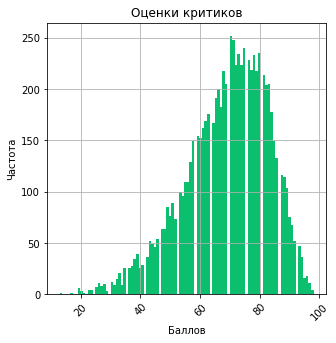

In [39]:
data['critic_score'].hist(grid=True, xlabelsize=10, xrot=45, ylabelsize=10,
                          yrot=0, figsize=(5, 5), bins=100, color='#0BBF6E')
plt.xlabel('Баллов')
plt.ylabel('Частота')
plt.title('Оценки критиков')
plt.show()

Распределение близко к нормальному: имеется левый хвост. Аномальные значения отсутствуют, данные соответствуют легенде (от 0 до 100). В данных много пропусков. Заполнить их не видится возможным - оставляем, как есть.

In [40]:
data['critic_score'].isna().sum()

8461

#### **Оценка пользователей**

In [41]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [42]:
data['critic_score'].isna().sum()

8461

In [43]:
data.query('user_score == "tbd"')['user_score'].count()

2376

In [44]:
data.query('user_score == "tbd"').groupby('platform').agg({'name': 'count'}).sort_values(by='name', ascending=False).head()

,name
platform,
DS,744
Wii,428
GBA,258
PS2,236
XB,146


В данных обнаружили значения `tbd`, таких значений достаточно много.

Вероятнее всего `tbd` стоит понимать как `To Be Determined`. Фактически это означает, что оценка игроков не определена, отсутствует. Скорее всего в `data` это значение попало из-за особенностей тех или иных платформ: какие-то платформы при отсутствии оценок ставят пропуск, какие-то -- `tbd` (это в основном платформы `DS`, `Wii`). Для нужд исследования заменим `tbd` на `NaN`.

In [45]:
data['user_score'] = data['user_score'].replace('tbd', 'NaN').astype('float')

In [46]:
data['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

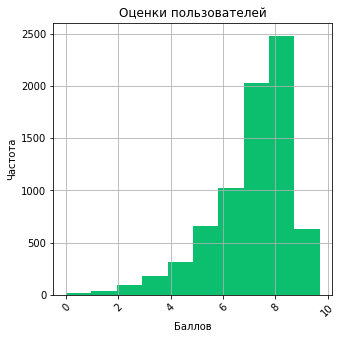

In [47]:
data['user_score'].hist(grid=True, xlabelsize=10, xrot=45, ylabelsize=10,
                        yrot=0, figsize=(5, 5), bins=10, color='#0BBF6E')
plt.xlabel('Баллов')
plt.ylabel('Частота')
plt.title('Оценки пользователей')
plt.show()

Распределение отличается от нормального: имеется левый хвост. Аномальные значения отсутствуют, данные соответствуют легенде (от 0 до 10). В данных много пропусков. Заполнить их все не видится возможным - оставили, как есть.

In [48]:
data['user_score'].isna().sum()

8981

#### **Рейтинг от организации ESRB**

Изучили особенности присвоения [рейтингов.](https://www.esrb.org/ratings-guide/)

Также изучили: https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

In [49]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [50]:
data['rating'].isna().sum()

6676

Пропусков много, их природа неясна. Возможны как технические ошибки при формировании `data`, так и принципиальное отсутствие рейтинга у той или иной игры. Вероятно, часть из пропусков можно заполнить вручную сведениями из открытых источников. Однако для целей настоящего исследования в этом нет необходимости.

Заполнить пропуски рейтингом `RP` некорректно, ибо он используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

Рейтинг `K-A` устарел, заменим его на аналогичный `E`.

In [51]:
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

#### **Суммарные продажи**

Для удобства исследования дополним `data` данными о суммарных продажах во всех регионах:

In [52]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [53]:
data.reset_index(drop=True, inplace=True)

Финальный вид `data`:

In [54]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,corr_name,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,Wii Sports,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,Super Mario Bros.,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Mario Kart Wii,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,Wii Sports Resort,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,Pokemon Red/Pokemon Blue,31.38


#### **Промежуточные выводы**
1. Более детально изучили данные.
2. Пропуски в `name` и `genre` удалили.
3. Пропуски в `year_of_release`, `rating`, `critic_score`, `user_score` не заполняли.
4. Сменили форматы данных для `user_score`.

---

### Исследование данных

#### Динамика выпуска игр

Изучили, сколько игр выпускалось в разные годы. Для прогнозирования, возможно, в дальнейшем из общего массива данных нужно будет выделить данные только за некоторые годы.

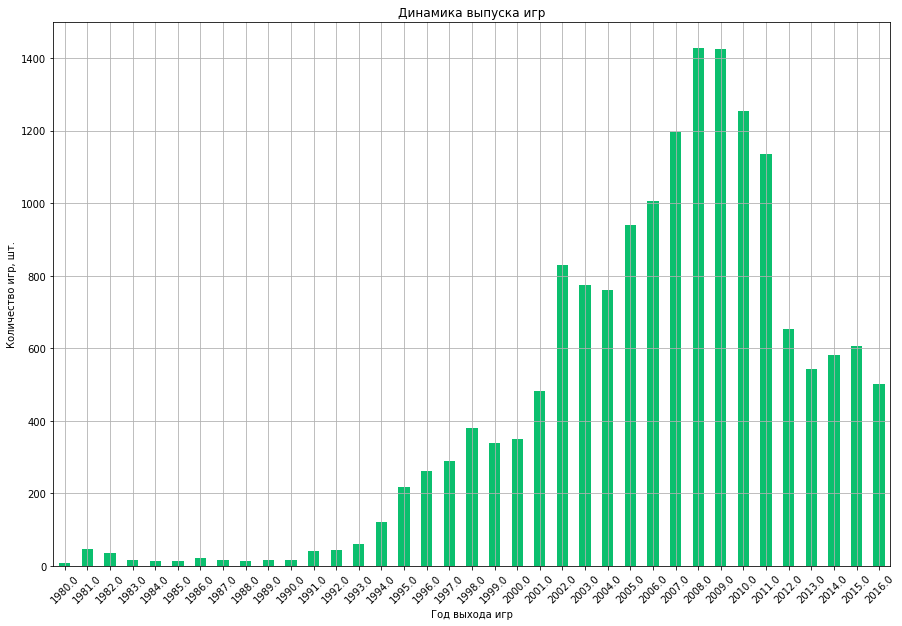

In [55]:
data.groupby('year_of_release')['name'].agg('count').\
plot(y='name', kind='bar', figsize=(15, 10), grid=True, color='#0BBF6E', rot=45, legend=False)
plt.xlabel('Год выхода игр')
plt.ylabel('Количество игр, шт.')
plt.title('Динамика выпуска игр')
plt.show()

Резкий рост количества выпущенных игр наблюдаем в 1994-1995 годах. Он, вероятно, связан с выпуском на рынок процессора "Pentium" и появлением ["Power PC".](https://ru.wikipedia.org/wiki/%D0%98%D1%81%D1%82%D0%BE%D1%80%D0%B8%D1%8F_%D0%BF%D0%B5%D1%80%D1%81%D0%BE%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BE%D0%B2#:~:text=%D0%B2%20%D1%81%D0%B5%D1%82%D0%B8%20%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82.-,1994%20%D0%B3%D0%BE%D0%B4,%D1%84%D0%B8%D1%80%D0%BC%D1%8B%20Apple%20Computers%20%E2%80%94%20Power%20PC)

Следующий скачок наблюдаем в 2002 году. Он, вероятно, связан с появлением "Nintendo" и развитием линейки игровых приставок ["Sony".](https://dtf.ru/hard/154172-evolyuciya-igrovyh-pristavok-sony)

Количество игр резко снизилось в 2012 году и продолжает уменьшаться.

#### Динамика продаж по платформам

Изучили, как менялись продажи по платформам, и выбрали ТОП-5 платформ с наибольшими суммарными продажами.

In [56]:
platform_sales = data.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).reset_index()
platform_sales.head()

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


In [57]:
top_platforms_list = list(platform_sales['platform'].head())
top_platforms_list

['PS2', 'X360', 'PS3', 'Wii', 'DS']

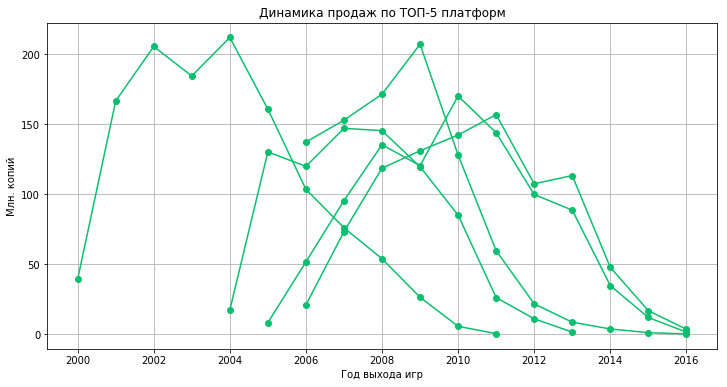

In [58]:
#для наглядности графиков по платформе DS отбросили данные до 2000 года
ax = data.query('platform == "PS2"').groupby('year_of_release').agg({'total_sales': 'sum'}).\
plot(y='total_sales', style='-o', grid=True, figsize=(12, 6), color='#0BBF6E', legend=False)

data.query('platform == "X360"').groupby('year_of_release').agg({'total_sales': 'sum'}).\
plot(y='total_sales', style='-o', grid=True, figsize=(12, 6), color='#0BBF6E', ax=ax, legend=False)

data.query('platform == "PS3"').groupby('year_of_release').agg({'total_sales': 'sum'}).\
plot(y='total_sales', style='-o', grid=True, figsize=(12, 6), color='#0BBF6E', ax=ax, legend=False)

data.query('platform == "Wii"').groupby('year_of_release').agg({'total_sales': 'sum'}).\
plot(y='total_sales', style='-o', grid=True, figsize=(12, 6), color='#0BBF6E', ax=ax, legend=False)

data.query('(platform == "DS") & (year_of_release >= 2000)').groupby('year_of_release').agg({'total_sales': 'sum'}).\
plot(y='total_sales', style='-o', grid=True, figsize=(12, 6), color='#0BBF6E', ax=ax, legend=False)

plt.xlabel('Год выхода игр')
plt.ylabel('Млн. копий')
plt.title('Динамика продаж по ТОП-5 платформ')
plt.show()

Построили график по всем платформам.

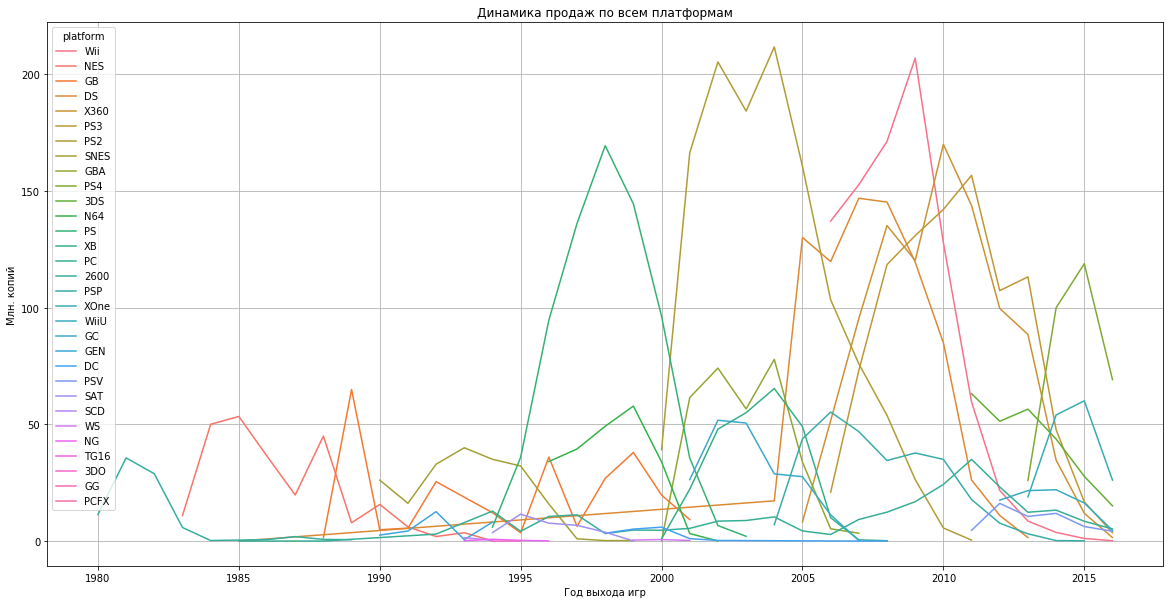

In [59]:
plt.figure(figsize=(20, 10))
sb.lineplot(x='year_of_release', y='total_sales', hue='platform', data=data, estimator='sum', ci=None)
plt.xlabel('Год выхода игр')
plt.ylabel('Млн. копий')
plt.title('Динамика продаж по всем платформам')
plt.grid()
plt.show()

**Обозрели графики и установили:**
1. платформы имеют ограниченный срок существования;
2. такой срок составляет примерно 10 лет;
3. смена платформ объясняется развитием технологий;
4. игры некоторых платформ по состоянию на 2015 год не продаются;
5. большинство платформ имеют сходный жизненный цикл: появление-->резкий рост-->резкий спад-->исчезновение;
6. не видим ни одной платформы в стадии роста: видим спад, завершившийся или продолжающийся;
7. для нужд исследования и прогнозирования будем использовать данные **с 2013 по 2015 годы**:
- в течение этого периода на рынке были представлены все относительно новые платформы;
- данные за 2016 год могут быть неполными - не будем их учитывать;
8. прогнозирование развития платформ после 2015 года в целом затруднено: все существующие платформы переживают или уже пережили спад, появление новых платформ предсказать невозможно.

Построили график по всем платформам с 2013 по 2015 годы.

В дальнейшем исследовании используем данные **только за этот период**.

In [60]:
act_data = data.query('2013 <= year_of_release <= 2015')
act_data.reset_index(inplace=True, drop=True)
act_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,corr_name,total_sales
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,Grand Theft Auto V,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,Grand Theft Auto V,16.27
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,Call of Duty: Black Ops 3,14.63
3,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,Pokemon X/Pokemon Y,14.60
4,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,Grand Theft Auto V,12.62


Выбрали ТОП-5 платформ с наибольшими суммарными продажами **с 2013 по 2015 годы**.

In [61]:
act_data.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).head()

platform
PS4     244.89
PS3     177.83
X360    135.28
XOne    133.17
3DS     128.11
Name: total_sales, dtype: float64

Переформировали список ТОП-5 платформ:

In [62]:
platform_sales_act = act_data.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).reset_index()
top_platforms_list = list(platform_sales_act['platform'].head())
top_platforms_list

['PS4', 'PS3', 'X360', 'XOne', '3DS']

Справочно выбрали ТОП-5 платформ с наибольшими суммарными продажами **в 2015 году**.

In [63]:
act_data.query('year_of_release == 2015').groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).head()

platform
PS4     118.90
XOne     60.14
3DS      27.78
PS3      16.82
WiiU     16.35
Name: total_sales, dtype: float64

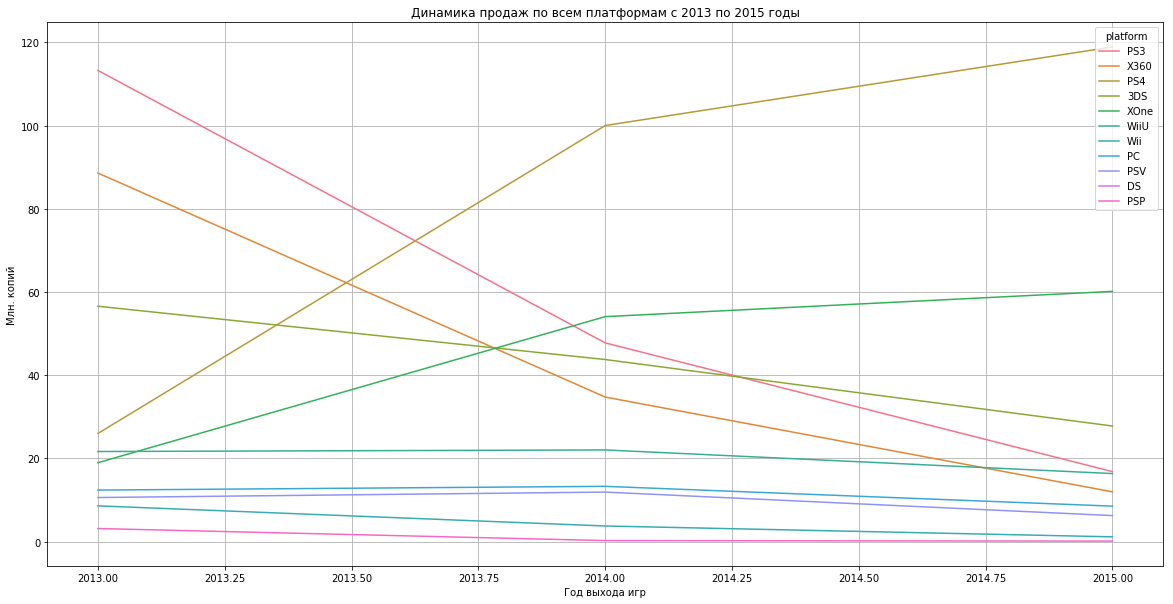

In [64]:
plt.figure(figsize=(20, 10))
sb.lineplot(x='year_of_release', y='total_sales', hue='platform', data=act_data, estimator='sum', ci=None)
plt.xlabel('Год выхода игр')
plt.ylabel('Млн. копий')
plt.title('Динамика продаж по всем платформам с 2013 по 2015 годы')
plt.grid()
plt.show()

**Обозрели графики и установили:**
- большинство платформ в стадии роста: видим спад, завершившийся или продолжающийся;
- в стадии роста платформы `PS4` и `XOne`;
- лидеры продаж динамично меняются; так, например, платформа `PS3` со второго места по итогам 2013-2015 годов переместилась на 4-ое по итогам только 2015 года.

#### Распределение глобальных продаж по платформам

Построили графики «ящик с усами» по глобальным продажам игр в разбивке по платформам.

График № 1 по `total_sales` в разрезе платформ:

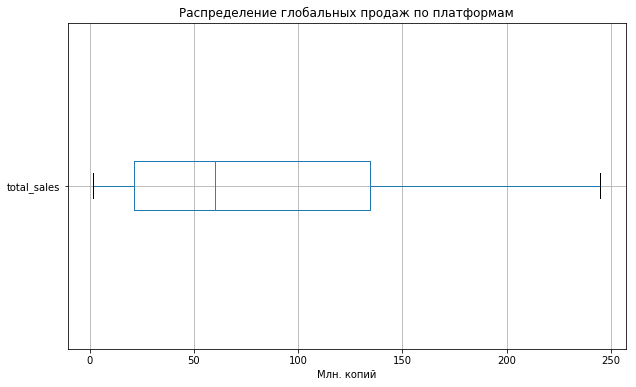

In [65]:
act_data.groupby('platform')['total_sales'].agg('sum').\
plot(y='total_sales', kind='box', grid=True, figsize=(10, 6), vert=False)
plt.xlabel('Млн. копий')
plt.title('Распределение глобальных продаж по платформам')
plt.show()

График № 2 по `total_sales` в разрезе платформ и лет:

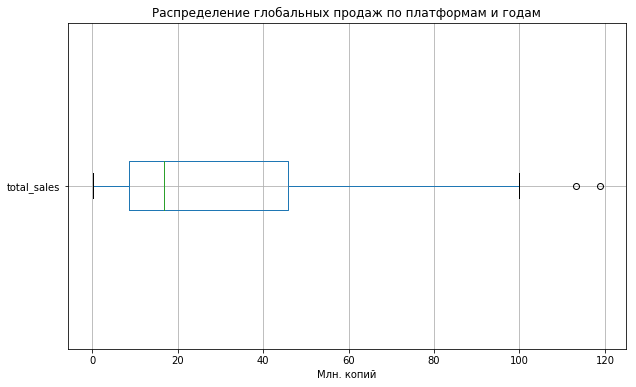

In [66]:
act_data.groupby(['platform', 'year_of_release'])['total_sales'].agg('sum').\
plot(y='total_sales', kind='box', grid=True, figsize=(10, 6), vert=False)
plt.xlabel('Млн. копий')
plt.title('Распределение глобальных продаж по платформам и годам')
plt.show()

График № 3 по `total_sales` в разрезе отдельных игр:

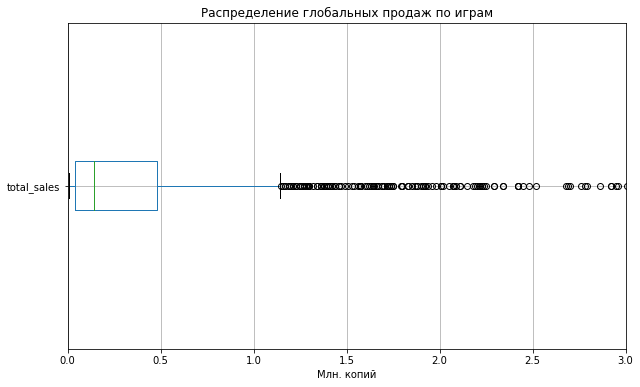

In [67]:
act_data.plot(y='total_sales', kind='box', grid=True, figsize=(10, 6), xlim=(0, 3), vert=False)
plt.xlabel('Млн. копий')
plt.title('Распределение глобальных продаж по играм')
plt.show()

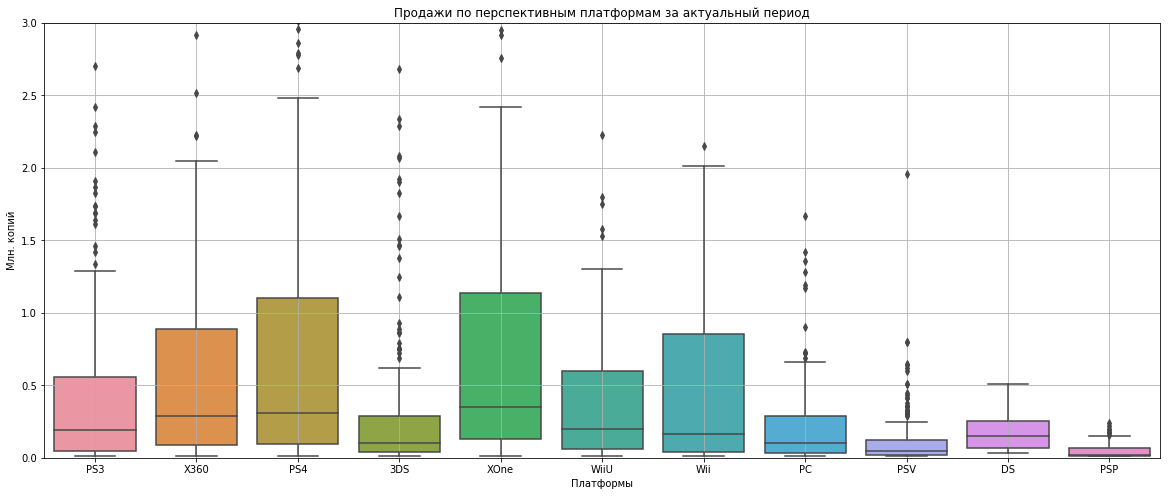

In [68]:
plt.figure(figsize=(20, 8))
(sb.boxplot(data = act_data, y = 'total_sales', x='platform')\
 .set(title = 'Продажи по перспективным платформам за актуальный период',
      xlabel = 'Платформы', ylabel = 'Млн. копий', ylim=(0, 3)))
plt.grid()
plt.show()

**Обозрели графики и установили:**
- медиана по платформам около 60 млн. копий, в разбивке по годам - около 17 млн.;
- распределения не являются нормальными, имеется правый хвост;
- у диаграммы № 1 все данные находятся в рамках нормальных значений, у диаграммы № 2 два выброса - данные распределены хоть и не нормально, но довольно равномерно;
- распределение же продаж по отдельным играм куда менее равномерно: существует длинный правый хвост; медиана около 0,15;
- упрощённо говоря, между продажами отдельных игр может быть существенная разница, между суммарными продажами платформ разница существенно меньше;
- распределения по лидирующим платформам `PS4`, `XOne`, `X360` схожи: медиана около 0,25, длинный правый хвост.

#### Влияние отзывов на продажи

Для исследования в этой части использовали данные по продажам платформы `PS4`. Она - лидер по продажам за период 2013-2015 годы.

In [69]:
act_data_PS4 = act_data.query('platform == "PS4"')
act_data_PS4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,corr_name,total_sales
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,Call of Duty: Black Ops 3,14.63
4,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,Grand Theft Auto V,12.62
9,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,FIFA 16,8.58
10,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,Star Wars Battlefront (2015),7.98
11,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,Call of Duty: Advanced Warfare,7.66


##### Влияние отзывов критиков

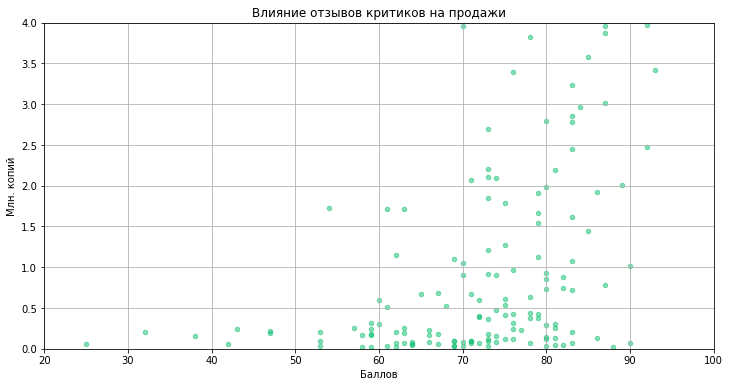

In [70]:
act_data_PS4.plot(x='critic_score', y='total_sales', kind='scatter',
                   alpha=0.5, figsize=(12, 6), color='#0BBF6E', grid=True,
                   xlim=(20, 100), ylim=(0, 4))
plt.xlabel('Баллов')
plt.ylabel('Млн. копий')
plt.title('Влияние отзывов критиков на продажи')
plt.show()

In [71]:
act_data_PS4['critic_score'].corr(act_data_PS4['total_sales'])

0.4318482049982005

Связь можно охарактеризовать как "средняя". Из диаграммы рассеяния видно, что влияние усиливается в зоне высоких оценок критиков:
- продажи могут не отличаться, если критики выставили оценку до 70 баллов;
- продажи могут существенно отличаться, если оценки достигают 80-90 баллов;
- высоко оценённые критиками игры могут хорошо продаваться.

##### Влияние отзывов игроков

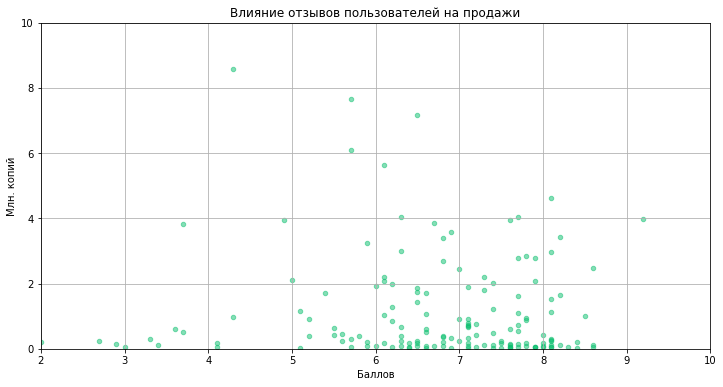

In [72]:
act_data_PS4.plot(x='user_score', y='total_sales', kind='scatter',
                   alpha=0.5, figsize=(12, 6), color='#0BBF6E', grid=True,
                   xlim=(2, 10), ylim=(0, 10))
plt.xlabel('Баллов')
plt.ylabel('Млн. копий')
plt.title('Влияние отзывов пользователей на продажи')
plt.show()

In [73]:
act_data_PS4['user_score'].corr(act_data_PS4['total_sales'])

0.024230832360622585

Связь близка к 0. Из диаграммы видно, что как низко, так и высоко оценённые пользователями игры могут иметь различные объёмы продаж. Эффекта "высоких оценок", как в случае с критиками, не наблюдается.

Рассчитали коэффициенты корреляции продаж с оценками по всем платформам.

In [74]:
act_platform_list = list(act_data['platform'].unique())
for platform in act_platform_list:
    acr_data_plat = act_data.query('platform == @platform')
    print(platform)
    print('Корреляция с критиками:', acr_data_plat['critic_score'].corr(acr_data_plat['total_sales']))
    print('Корреляция с игроками:', acr_data_plat['user_score'].corr(acr_data_plat['total_sales']))

PS3
Корреляция с критиками: 0.3342853393371919
Корреляция с игроками: -0.0163327283435134
X360
Корреляция с критиками: 0.3503445460228664
Корреляция с игроками: -0.03456245410023822
PS4
Корреляция с критиками: 0.4318482049982005
Корреляция с игроками: 0.024230832360622585
3DS
Корреляция с критиками: 0.38432600457452254
Корреляция с игроками: 0.2647112067029276
XOne
Корреляция с критиками: 0.45938456807071054
Корреляция с игроками: -0.03926828544552199
WiiU
Корреляция с критиками: 0.3839512824903964
Корреляция с игроками: 0.43347621147369286
Wii
Корреляция с критиками: nan
Корреляция с игроками: 0.6829417215362368
PC
Корреляция с критиками: 0.2164032074613741
Корреляция с игроками: -0.12942822535329043
PSV
Корреляция с критиками: 0.30315995162182907
Корреляция с игроками: 0.017514570845124845
DS
Корреляция с критиками: nan
Корреляция с игроками: nan
PSP
Корреляция с критиками: nan
Корреляция с игроками: -0.9999999999999999


Влияние оценок на продажи по разным платформам различно, но нигде не является определяющим. По некоторым платформам связь с оценками пользователей отрицательная. В целом для прогнозирования продаж либо влияния на их объёмы оценок критиков и уж тем более пользователей недостаточно.

Результаты можно объяснить субъективностью оценок, отсутствием единой методики их выставления, ошибками в оценках.

#### Распределение по жанрам

In [75]:
genres_sales = act_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genres_sales

genre
Action          291.76
Shooter         194.76
Role-Playing    127.71
Sports          127.16
Misc             60.22
Platform         39.40
Racing           37.10
Fighting         30.84
Simulation       19.87
Adventure        19.82
Strategy          8.95
Puzzle            3.16
Name: total_sales, dtype: float64

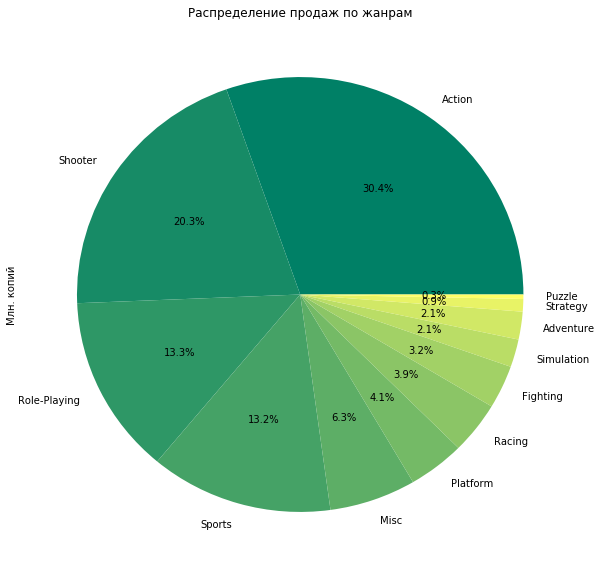

In [76]:
genres_sales.plot(kind='pie', figsize=(10, 10), grid=True, legend=False, cmap='summer', autopct='%1.1f%%')
plt.ylabel('Млн. копий')
plt.title('Распределение продаж по жанрам')
plt.show()

Продажи по жанрам существенно отличаются:
- в лидерах "активные" игры: экшн, спорт, шутеры;
- в аутсайдерах "спокойные" стратегии и паззлы.

In [77]:
genres_amount = act_data.groupby('genre')['name'].count().sort_values(ascending=False)
genres_amount

genre
Action          588
Role-Playing    238
Adventure       189
Sports          166
Shooter         140
Misc            123
Fighting         64
Racing           61
Platform         59
Simulation       44
Strategy         43
Puzzle           16
Name: name, dtype: int64

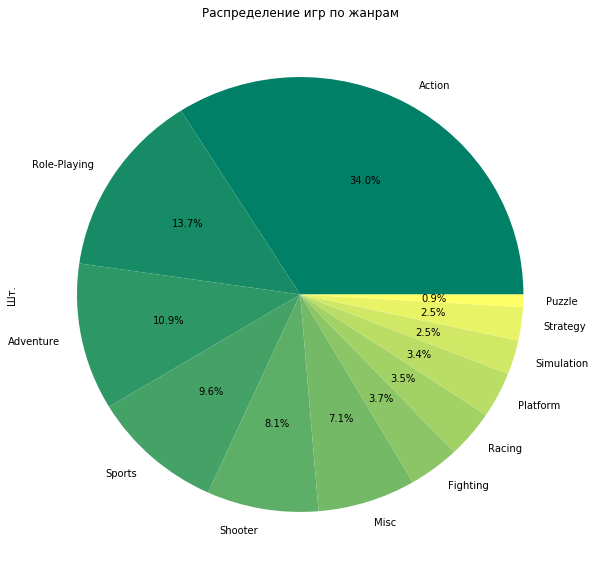

In [78]:
genres_amount.plot(kind='pie', figsize=(10, 10), grid=True, legend=False, cmap='summer', autopct='%1.1f%%')
plt.ylabel('Шт.')
plt.title('Распределение игр по жанрам')
plt.show()

Распределение игр по жанрам в выборке похоже на распределенеи продаж:
- в лидерах "активные" игры: экшн, спорт;
- в аутсайдерах "спокойные" стратегии и паззлы.

Дополнительно визуализировали распределение продаж по жанрам по ТОП-5 платформ (см. список выше).

Как видно, распределение по жанрам в ТОП-5 повторяет общую картину. При этом для отдельных платформ можно выделить "жанры-чемпионы". Так, например, для `PS3` это экшн, для `Wii` - спорт.

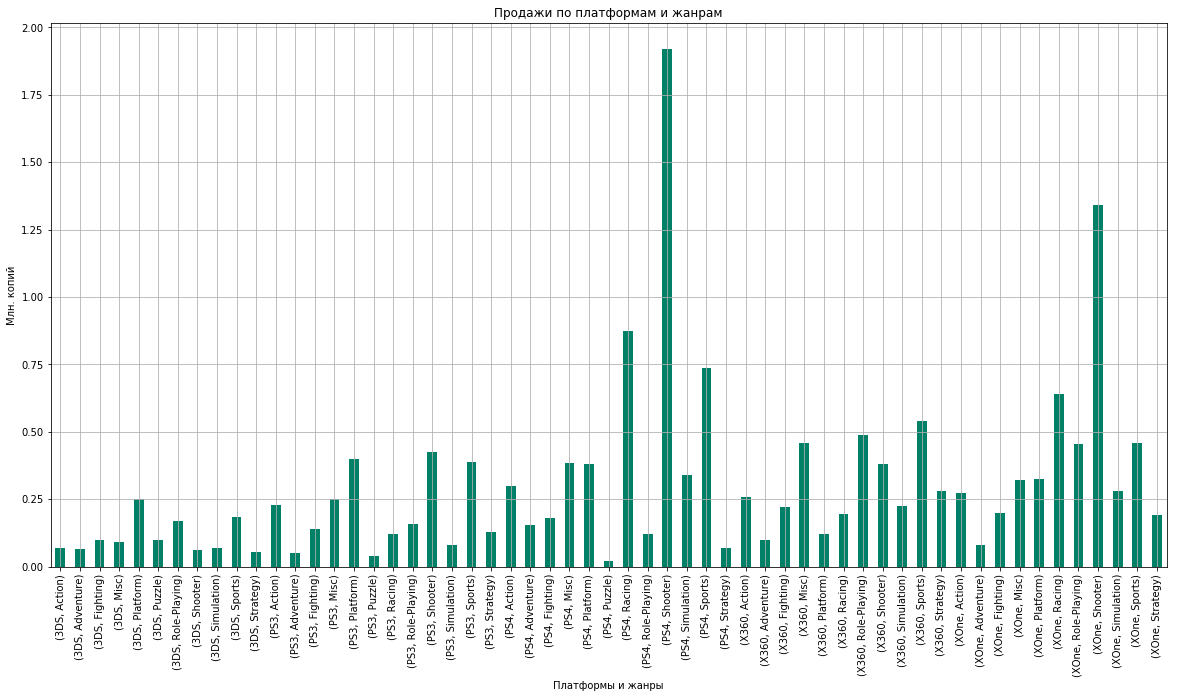

In [79]:
act_data.query('platform in @top_platforms_list').\
groupby(['platform', 'genre'])['total_sales'].median().\
plot(kind='bar', figsize=(20, 10), grid=True, legend=False, rot=90, cmap='summer')
plt.xlabel('Платформы и жанры')
plt.ylabel('Млн. копий')
plt.title('Продажи по платформам и жанрам')
plt.show()

#### Портреты пользователей каждого региона

Выделили для продаж в регионах характерные платформы и жанры, а также определили, влияет ли рейтинг ESRB на продажи в отдельном регионе.

##### Северная Америка

In [80]:
na_platform = act_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
na_platform

platform
PS4     87.25
X360    80.97
XOne    78.85
PS3     62.83
3DS     34.06
Name: na_sales, dtype: float64

In [81]:
na_genre = act_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
na_genre

genre
Action          116.76
Shooter          93.50
Sports           57.73
Role-Playing     40.51
Misc             26.73
Name: na_sales, dtype: float64

In [82]:
na_rating = act_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head()
na_rating

rating
M       149.54
E        71.08
E10+     50.43
T        40.84
Name: na_sales, dtype: float64

Портрет типичного пользователя из Северной Америки:
- играет в игры "активных" жанров,
- предпочитает платформы PS4, X360, XOne,
- играет в игры с рейтингами `M`, `E`, `E10+` (соответственно игры для старших подростков, детей и подростков).

##### Европа

In [83]:
eu_platform = act_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
eu_platform

platform
PS4     109.31
PS3      66.55
XOne     41.96
X360     41.81
3DS      28.63
Name: eu_sales, dtype: float64

In [84]:
eu_genre = act_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
eu_genre

genre
Action          107.45
Shooter          71.96
Sports           48.51
Role-Playing     32.69
Misc             19.38
Name: eu_sales, dtype: float64

In [85]:
eu_rating = act_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head()
eu_rating

rating
M       128.78
E        69.75
E10+     38.88
T        32.16
Name: eu_sales, dtype: float64

Портрет типичного пользователя из Европы:
- играет в игры "активных" жанров,
- предпочитает платформы PS4, PS3, XOne,
- играет в игры с рейтингами `M`, `E`, `E10+` (соответственно игры для старших подростков, детей и подростков).

##### Япония

In [86]:
jp_platform = act_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
jp_platform

platform
3DS     59.78
PS3     22.05
PSV     15.03
PS4     10.22
WiiU    10.21
Name: jp_sales, dtype: float64

In [87]:
jp_genre = act_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
jp_genre

genre
Role-Playing    44.43
Action          33.42
Misc             8.16
Fighting         6.90
Shooter          5.55
Name: jp_sales, dtype: float64

In [88]:
jp_rating = act_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head()
jp_rating

rating
T       18.32
E       14.07
M       12.91
E10+     5.44
Name: jp_sales, dtype: float64

Портрет типичного пользователя из Японии:
- играет в ролевые игры и экшн,
- предпочитает платформы 3DS, PS3, PSV,
- играет в игры с рейтингами `E`, `M`, `T` (соответственно игры для детей, взрослых и подростков).

Как видно, портреты пользователей разных регионов различаются, но не кардинально.

Пользователи регионов предпочитают "активные" жанры и игры для детей/подростков.

Японию выделяет пристрастие к рлевым играм и платформам 3DS, PSV.

##### Влияние рейтинга ESRB

In [89]:
esrb = act_data.groupby('rating').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum', 'total_sales': 'sum'})
esrb

,na_sales,eu_sales,jp_sales,total_sales
rating,,,,
E,71.08,69.75,14.07,174.42
E10+,50.43,38.88,5.44,106.26
M,149.54,128.78,12.91,333.33
T,40.84,32.16,18.32,102.50


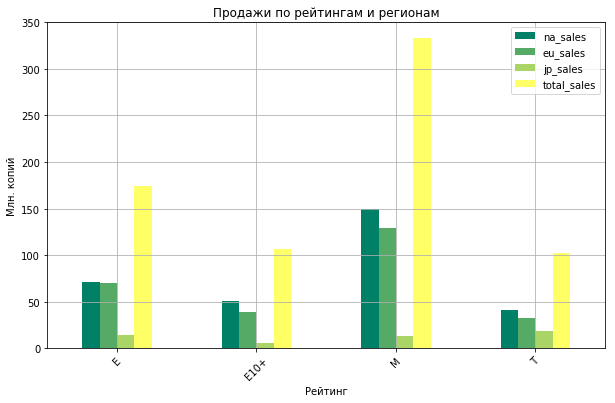

In [90]:
esrb.plot(kind='bar', figsize=(10, 6), grid=True, legend=True, rot=45, cmap='summer')
plt.xlabel('Рейтинг')
plt.ylabel('Млн. копий')
plt.title('Продажи по рейтингам и регионам')
plt.show()

Не вполне корректно говорить, что возрастной рейтинг влияет на продажи. Популярностью пользуются игры, адресованные детям и подросткам, а им в свою очередь присваивают соответствующие рейтинги. Вернее сказать, что изготовители игр должны стремиться укладываться в рамки рейтингов E, E10+, M, T (соответственно игры для детей, подростков, старших подростков): такие игры наиболее популярны. Магазину же стоит включать в ассортимент игры именно с такими рейтингами.

Игры с рейтингами `AO` и `EC` (соответственно игры только для взрослых и игры для малышей), напротив, непопулярны.

Если магазину нужно выбрать между, например, шутером с рейтингом `M` и шутером с натуралистичными сценами насилия с рейтином `AO`, то выбор стоит сделать в пользу первого.

#### Промежуточные выводы
1. изучили динамику выпуска игр; выявили, что с 2002 по 2012 годы количество игр росло, с 2012 года оно снижается;
2. изучили динамику продаж по платформам; выявили, что «жизненный цикл» платформы около 10 лет;
3. не обнаружили ни одной платформы в стадии роста: видим спад, завершившийся или продолжающийся;
4. для нужд исследования и прогнозирования использовали данные с 2013 по 2015 годы;
5. прогнозирование развития платформ после 2015 года в целом затруднено: все существующие платформы переживают или уже пережили спад, появление новых платформ предсказать невозможно;
6. определили, что в стадии роста платформы PS4, XOne;
7. лидеры продаж динамично меняются;
8. между продажами отдельных игр может быть существенная разница, между суммарными продажами платформ разница существенно меньше;
9. влияние оценок критиков и пользователей на продажи по разным платформам различно, но нигде не является определяющим;
10. в целом для прогнозирования продаж либо влияния на их объёмы оценок критиков и уж тем более пользователей недостаточно;
11. продажи по жанрам существенно отличаются: в лидерах "активные" игры: экшн, спорт, шутеры; в аутсайдерах "спокойные" стратегии и паззлы;
12. портреты пользователей разных регионов различаются, но не кардинально;
13. пользователи регионов предпочитают "активные" жанры и игры для детей/подростков;
14. Японию выделяет пристрастие к ролевым играм и платформам 3DS, PSV;
15. изготовители игр должны стремиться укладываться в рамки рейтингов E, E10+, M, T (соответственно игры для детей, подростков, старших подростков): такие игры наиболее популярны;
16. магазину же стоит включать в ассортимент игры именно с такими рейтингами;
17. игры с рейтингами AO и EC (соответственно игры только для взрослых и игры для малышей), напротив, непопулярны.

---

### Проверка гипотез

#### Гипотеза о рейтингах платформ

Выдвинули нулевую и альтернативную гипотезы:

```
H_0: Средние пользовательские рейтинги платформы Xbox One = Средние пользовательские рейтинги платформы PC.
H_a: Средние пользовательские рейтинги платформы Xbox One ≠ Средние пользовательские рейтинги платформы PC.
Пороговое значение alpha = 0.05. Это приемлемый уровень достоверности.
```

Перед проверкой удалили пропуски:

In [91]:
act_data_hyp = act_data.dropna(subset=['user_score'])

In [92]:
act_data_hyp.query('platform == "XOne"')['user_score'].count()

116

In [93]:
act_data_hyp.query('platform == "PC"')['user_score'].count()

110

Применили метод ttest_ind: проверяем 2 независимых генеральных совокупности.

Выборки имеют одинаковый размер - установим `equal_var=True`.

In [94]:
results_1 = st.ttest_ind(act_data_hyp.query('platform == "XOne"')['user_score'],
                       act_data_hyp.query('platform == "PC"')['user_score'],
                       equal_var=True)

alpha = 0.05

print(results_1.pvalue)

if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.2827494983260732
Не получилось отвергнуть нулевую гипотезу


**Пришли к заключению:**

Средние пользовательские рейтинги платформы Xbox One = Средние пользовательские рейтинги платформы PC.

#### Гипотеза о рейтингах жанров

Выдвинули нулевую и альтернативную гипотезы:

```
H_0: Средние пользовательские рейтинги жанров Action = Средние пользовательские рейтинги жанров Sports.
H_a: Средние пользовательские рейтинги жанров Action ≠ Средние пользовательские рейтинги жанров Sports.
Пороговое значение alpha = 0.05. Это приемлемый уровень достоверности.
```

In [95]:
act_data_hyp.query('genre == "Action"')['user_score'].count()

304

In [96]:
act_data_hyp.query('genre == "Sports"')['user_score'].count()

123

Применили метод ttest_ind: проверяем 2 независимых генеральных совокупности.

Выборки имеют различный размер - установим `equal_var=False`.

In [97]:
results_2 = st.ttest_ind(act_data_hyp.query('genre == "Action"')['user_score'],
                       act_data_hyp.query('genre == "Sports"')['user_score'],
                       equal_var=False)

alpha = 0.05

print(results_2.pvalue)

if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

3.5076737062533683e-19
Отвергаем нулевую гипотезу


**Пришли к заключению:**

Средние пользовательские рейтинги жанров Action ≠ Средние пользовательские рейтинги жанров Sports.

#### Промежуточные выводы
1. Выдвинули 2 пары нулевой и альтернативной гипотез.
2. В первом случае нулевую гипотезу не смогли отвергнуть, во втором отвергли.

---

### Общие выводы
1. Изучили данные о продажах игр разных жанров и платформ в различных регионах мира.
2. В целом данные оценены как корректные. Пропуски в данных об оценках критиков и пользователей решили не удалять и не заменять. Скорее всего, наличие пропусков в этих данных − следствие особенностей игровых платформ.
3. Изучили динамику выпуска игр; выявили, что с 2002 по 2012 годы количество выпущенных игр росло, с 2012 года оно снижается.
4. Изучили динамику продаж по платформам; выявили, что «жизненный цикл» платформы около 10 лет. Смену платформ на рынке можно объяснить развитием технологий: постоянно появляются новые игровые платформы, старые теряют актуальность и уходят с рынка.
5. По изучении динамики продаж обнаружили что в стадии роста платформы PS4 и XOne. По остальным платформам видим спад, завершившийся или продолжающийся. Общее впечатление от рынка игр: стагнация.
6. Установили, что для нужд исследования и прогнозирования целесообразно использовать данные с 2013 по 2015 годы.
7. Прогнозирование развития платформ после 2015 года в целом затруднено: все существующие платформы переживают или уже пережили спад, появление новых платформ предсказать невозможно. Выход на рынок новой платформы может привести к всплеску продаж игр.
8. Определили, что потенциально интересны для магазина платформы PS4, XOne. Вероятно, что игры для этих платформ будут продаваться ещё 2-3 года.
9. Между продажами отдельных игр может быть существенная разница, между суммарными продажами платформ разница существенно меньше.
10. Влияние оценок критиков и пользователей на продажи по разным платформам различно, но нигде не является определяющим. В целом для прогнозирования продаж либо влияния на их объёмы оценок критиков и уж тем более пользователей недостаточно.
11. Продажи по жанрам существенно отличаются: в лидерах "активные" игры: экшн, спорт, шутеры; в аутсайдерах "спокойные" стратегии и паззлы.
12. Портреты пользователей разных регионов различаются, но не кардинально. Пользователи разных регионов предпочитают "активные" жанры и игры для детей/подростков. Японию выделяет пристрастие к ролевым играм и платформам 3DS, PSV.
13. Магазину стоит ориентироваться на игры рейтингов E, E10+, M, T (соответственно игры для детей, подростков, старших подростков): такие игры наиболее популярны. Игры с рейтингами AO и EC (соответственно игры только для взрослых и игры для малышей), напротив, непопулярны.
14. Проверили 2 гипотезы. Установили, что:
- средние пользовательские рейтинги платформы Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные.